## Анализ причин выживаемости на Титанике


In [402]:
import pandas as pd # импортируем Pandas
import numpy as np
%matplotlib inline
data = pd.read_csv('train.csv')

### Гипотеза 1

__Выживаемость молодых женщин выше, чем выживаемость пожилых женщин__:

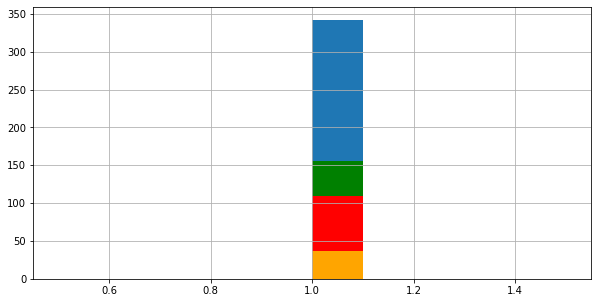

In [403]:
data[data['Survived'] == 1].Survived.hist(figsize=(10, 5))
data[((data['Sex'] == 'female') & (data['Age'] < 40.0) & (data['Survived'] == 1))].Survived.hist(figsize=(10, 5), color = 'green')
data[((data['Sex'] == 'male') & (data['Survived'] == 1))].Survived.hist(figsize=(10, 5), color = 'red')
data[((data['Sex'] == 'female') & (data['Age'] > 40.0) & (data['Survived'] == 1))].Survived.hist(figsize=(10, 5), color = 'orange')


__Вывод__:

  Из представленного графика видим, что выживаемость женщин (зеленый столбец) возрастом до 40 лет значительно выше выживаемости женщин после 40 (оранжевый столбец) и выше выживаемости мужчин (красный столбец)

###  Гипотеза 2

__Выживаемость молодых женщин выше, чем выживаемость молодых мужчин, выживаемость женщин в целом выше, чем выживаемость мужчин__:

In [407]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 30), (30, 50), (50, 70), (70, 100)])
survived_data = data[data['Survived'] == 1]
ct = pd.crosstab(survived_data['Sex'], pd.cut(survived_data['Age'], bins, right=False))
ct

Age,"(0, 10]","(10, 30]","(30, 50]","(50, 70]","(70, 100]"
Sex,,,,,
female,19,95,67,16,0
male,19,33,35,5,1


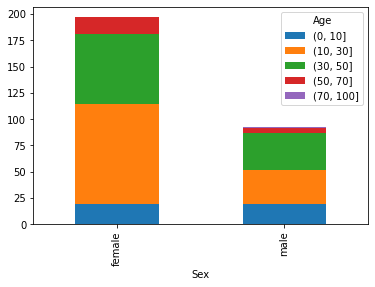

In [405]:
ct.plot.bar(stacked=True)

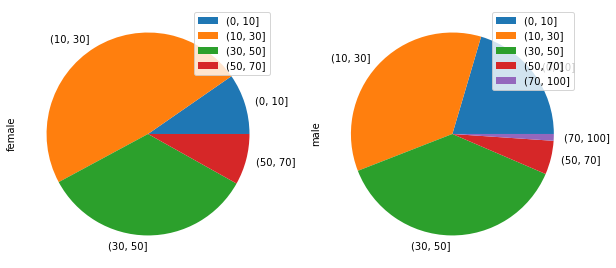

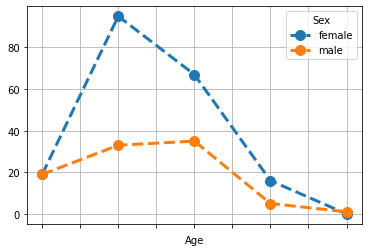

In [408]:
ct = pd.crosstab(pd.cut(survived_data['Age'], bins, right=False), survived_data['Sex'])
ct.plot.pie(subplots=True, figsize=(10, 10))
ct.plot.line(linestyle='--', marker='o', markersize=10, grid=True, lw=3)

__Вывод__:

  Из представленных графиков и распределения количества выживших мужчин и женщин по возрастам видим, что с увеличением возраста сокращается количество выживших как мужчин, так и женщин. При этом, независимо от возраста, количество выживших женщин больше количества выживших мужчин. Особенно значительна эта разница для молодежи, так как, согласно историческим данным, в первую очередь спасали молодых женщин и детей.

### Гипотеза 3
 
__Выживаемость одиноких (один родитель в семье) женщин или мужчин с детьми - выше, чем выживаемость одиноких женщин или мужчин без детей__:

  Замечание: согласно описанию структуры данных - в столбце Parch может быть как количество детей, так и количество родителей - и мы точно не знаем - кто из них кто (кто ребенок, а кто родитель пассажира) в связи с недостаточностью данных, так как оба значения хранятся в одном поле.
Исходя из описания данных на Kaggle, считаем что поле SibSp содержит количество родственников и супругов пассажира. Поэтому отбираем таких пассажиров, у которых нет родственников и супругов, есть дети, взрослый - детородного возраста

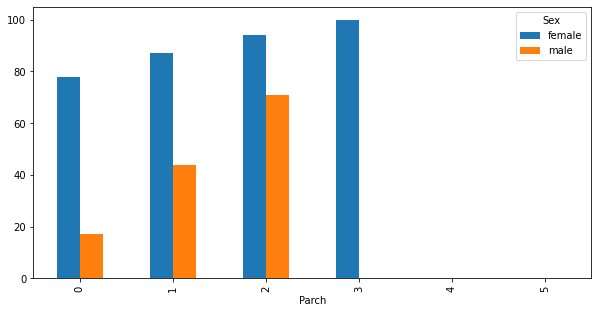

In [379]:
filtered_data = data[(data['SibSp'] == 0) & (data['Age'] < 40)]
series = round(100 * filtered_data.groupby(['Parch', 'Sex'])['Survived'].sum() / filtered_data.groupby(['Parch', 'Sex'])['PassengerId'].nunique())
series.unstack('Sex').plot.bar(figsize=(10, 5))



  На представленном графике видим зависимость - для семей из одного родителя с детьми - чем больше детей в семье, тем выше шанс родителя выжить. Однако, также можем видеть пару странных значений, когда имея 4 и 5 детей - одинокий родитель не выжил. Посмотрим на эти данные подробнее


In [409]:
data[data['SibSp'] == 0].groupby(['Parch']).filter(lambda x: any(x['Parch'] > 3)).Pclass.aggregate([min, max])

min    3
max    3
Name: Pclass, dtype: int64

In [410]:
data[data['SibSp'] == 0].groupby(['Parch']).filter(lambda x: any(x['Parch'] > 3)).Pclass.count()

3

  Видим, что таких семей всего три и все они из 3 класса обслуживания, в связи с чем можем сделать вывод, что в связи с нехваткой шлюпок и посадкой в них приоритетно сначала пассажиров более высоких классов обслуживания (1 и 2), шлюпок не хватило на данные семьи даже с учетом приорита в посадке семей с детьми. Либо данные семьи состояли из одинокого пассжира с родителями (нехватает данных для более детального анализа по родителям)


__Вывод__:

  Таким образом, согласно графикам, гипотеза о том, что одинокие пассажиры с детьми имели более высокий процент выживаемости, подтвердилась, так как такие пассажиры имели наивысший приоритет в посадке в шлюпки, согласно историческим данным

### Вывод исследования:

  

По результатам исследования видим, что пассажиры с детьми, молодые женщины были самыми приоритетными группами при спасении.  